In [0]:
import pandas as pd
df1 = pd.read_csv('/Volumes/workspace/default/airlines/Flight_delay_cleaned.csv')
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484310 entries, 0 to 484309
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         484310 non-null  int64 
 1   DayOfWeek          484310 non-null  int64 
 2   Date               484310 non-null  object
 3   DepTime            484310 non-null  object
 4   ArrTime            484310 non-null  object
 5   CRSArrTime         484310 non-null  object
 6   UniqueCarrier      484310 non-null  object
 7   Airline            484310 non-null  object
 8   FlightNum          484310 non-null  int64 
 9   TailNum            484310 non-null  object
 10  ActualElapsedTime  484310 non-null  int64 
 11  CRSElapsedTime     484310 non-null  int64 
 12  AirTime            484310 non-null  int64 
 13  ArrDelay           484310 non-null  int64 
 14  DepDelay           484310 non-null  int64 
 15  Origin             484310 non-null  object
 16  Org_Airport        4

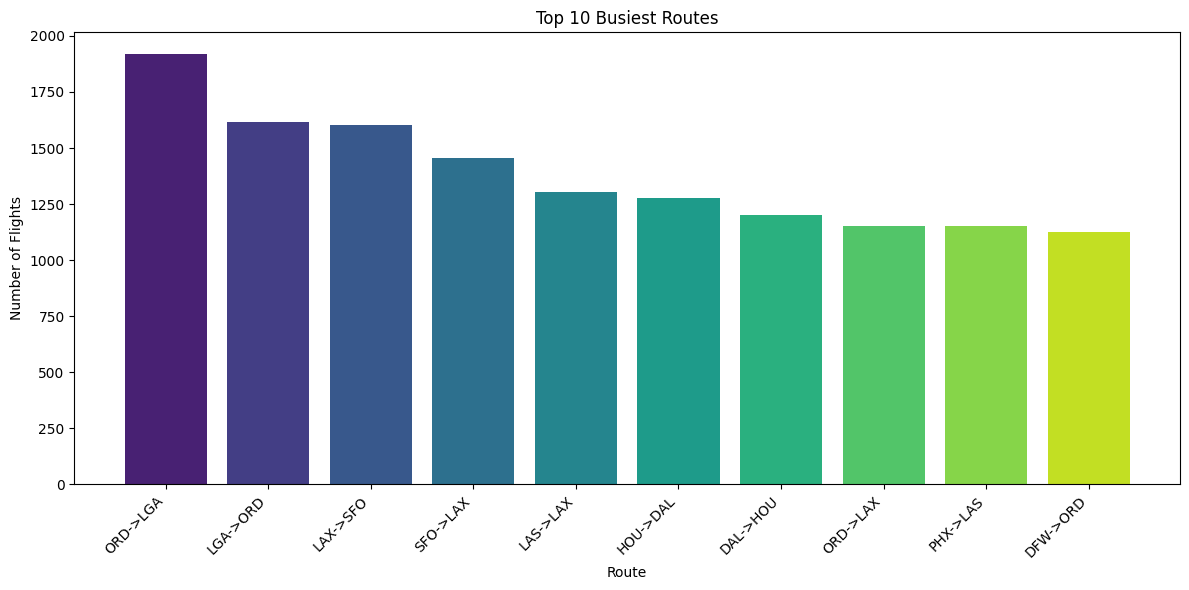

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create 'Route' column if not present
if 'Route' not in df1.columns:
    df1['Route'] = df1['Origin'] + '-' + df1['Destination']

# Get top 10 busiest routes
top_routes = df1['Route'].value_counts().head(10).reset_index()
top_routes.columns = ['Route', 'FlightCount']

# Gradient colors
colors = sns.color_palette("viridis", n_colors=10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_routes['Route'], top_routes['FlightCount'], color=colors)
plt.xlabel('Route')
plt.ylabel('Number of Flights')
plt.title('Top 10 Busiest Routes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
display(plt.gcf())
plt.close()

/home/spark-587306c7-7908-4b2c-a100-46/.ipykernel/2450/command-7638189631999575-2152103012:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=route_delays.values, y=route_delays.index, palette=colors)


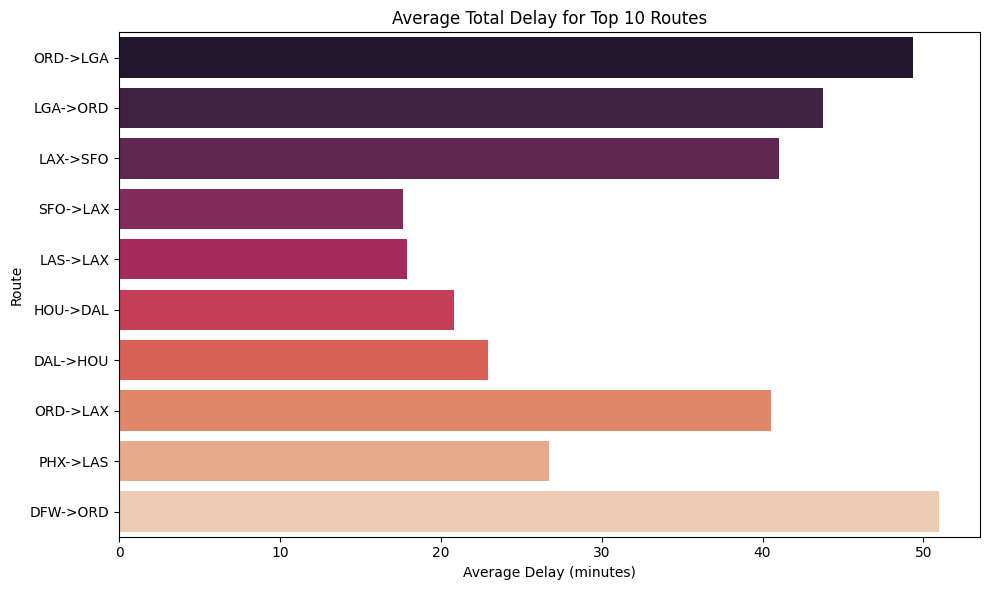

In [0]:
route_delays = df1.groupby('Route')['TotalDelay'].mean().loc[top_routes['Route']]
colors = sns.color_palette("rocket", n_colors=len(route_delays))
plt.figure(figsize=(10,6))
sns.barplot(x=route_delays.values, y=route_delays.index, palette=colors)
plt.title("Average Total Delay for Top 10 Routes")
plt.xlabel("Average Delay (minutes)")
plt.ylabel("Route")
plt.tight_layout()
display(plt.gcf())
plt.close()

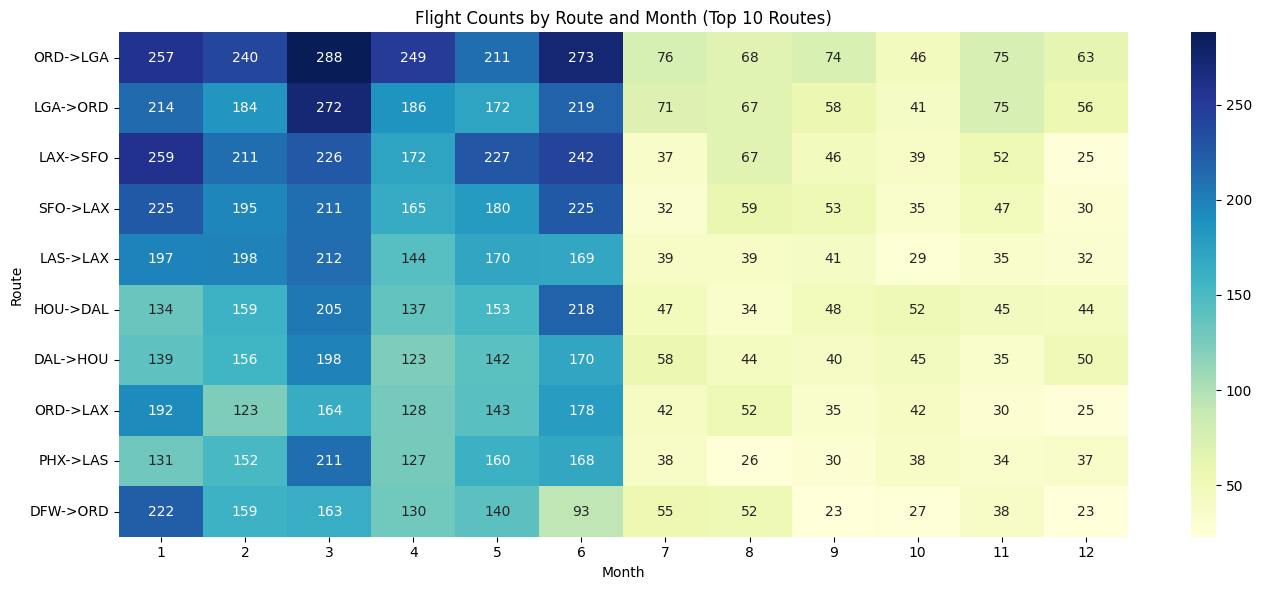

In [0]:
# Create 'Month' column if not present


# Pivot table: rows=Route, columns=Month, values=FlightCount
route_month_counts = df1.pivot_table(index='Route', columns='Month', values='FlightNum', aggfunc='count', fill_value=0)

# Select top 10 busiest routes
top_routes_list = top_routes['Route'].tolist()
route_month_counts = route_month_counts.loc[top_routes_list]

plt.figure(figsize=(14, 6))
sns.heatmap(route_month_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Flight Counts by Route and Month (Top 10 Routes)')
plt.xlabel('Month')
plt.ylabel('Route')
plt.tight_layout()
display(plt.gcf())
plt.close()

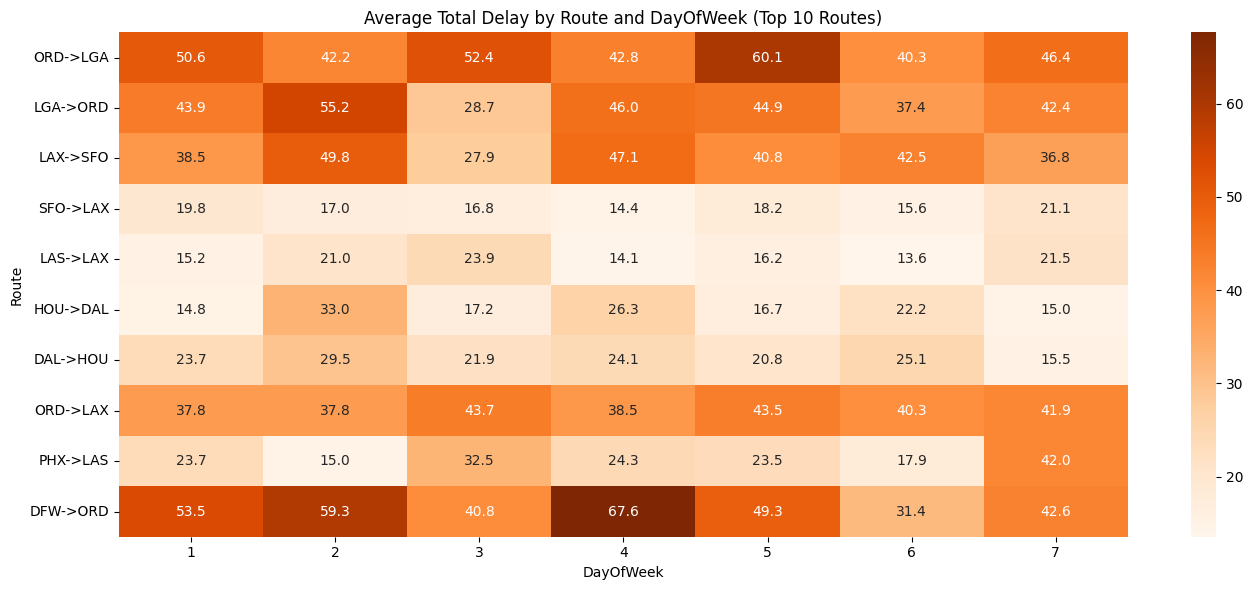

In [0]:
# Heatmap: Average Total Delay by Route and DayOfWeek (Top 10 Routes)
route_day_delay = df1.pivot_table(index='Route', columns='DayOfWeek', values='TotalDelay', aggfunc='mean', fill_value=0)
route_day_delay = route_day_delay.loc[top_routes['Route']]
plt.figure(figsize=(14, 6))
sns.heatmap(route_day_delay, annot=True, fmt='.1f', cmap='Oranges')
plt.title('Average Total Delay by Route and DayOfWeek (Top 10 Routes)')
plt.xlabel('DayOfWeek')
plt.ylabel('Route')
plt.tight_layout()
display(plt.gcf())
plt.close()

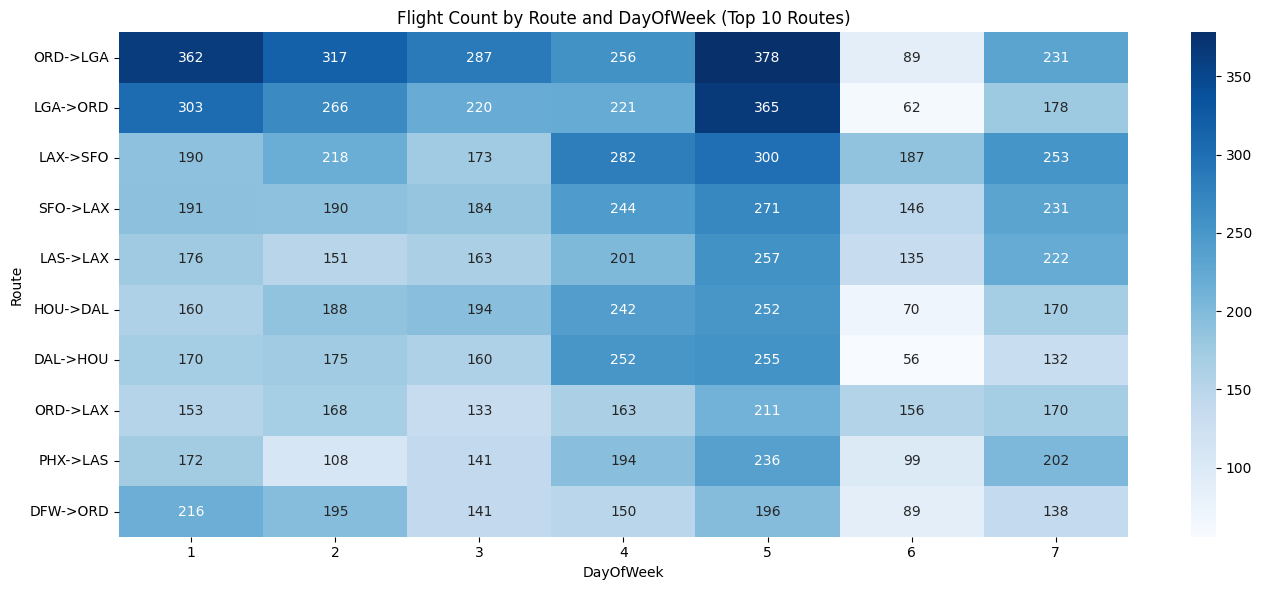

In [0]:
# Heatmap: Flight Count by Route and DayOfWeek (Top 10 Routes)
route_day_counts = df1.pivot_table(index='Route', columns='DayOfWeek', values='FlightNum', aggfunc='count', fill_value=0)
route_day_counts = route_day_counts.loc[top_routes['Route']]
plt.figure(figsize=(14, 6))
sns.heatmap(route_day_counts, annot=True, fmt='d', cmap='Blues')
plt.title('Flight Count by Route and DayOfWeek (Top 10 Routes)')
plt.xlabel('DayOfWeek')
plt.ylabel('Route')
plt.tight_layout()
display(plt.gcf())
plt.close()

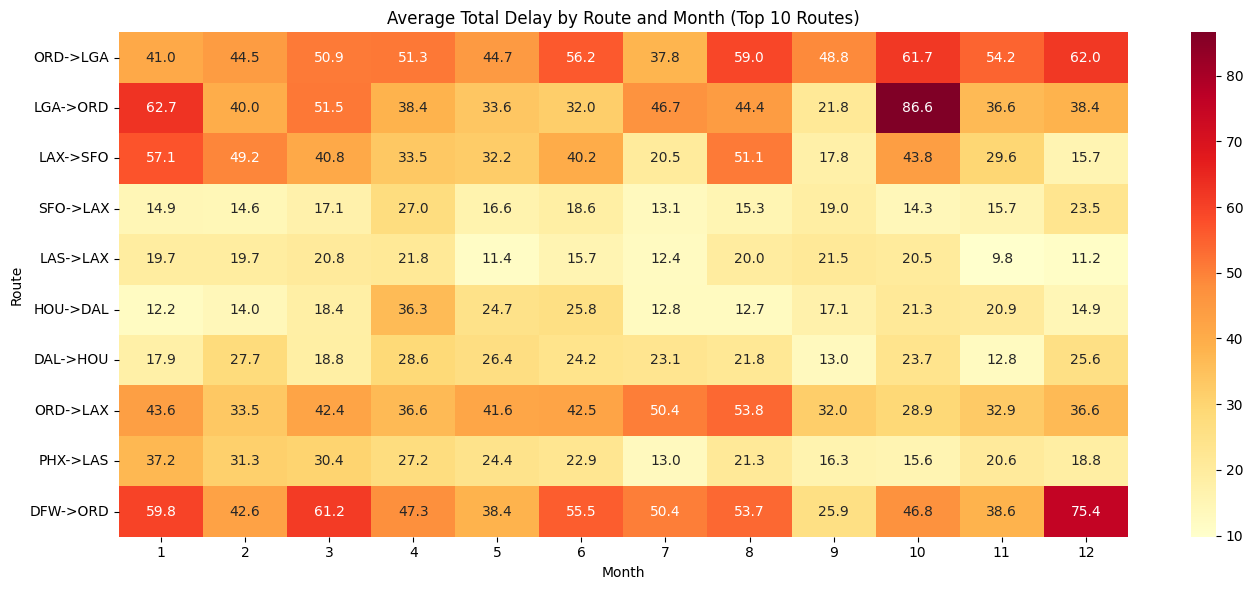

In [0]:
# Heatmap: Average Total Delay by Route and Month (Top 10 Routes)
route_month_delay = df1.pivot_table(index='Route', columns='Month', values='TotalDelay', aggfunc='mean', fill_value=0)
route_month_delay = route_month_delay.loc[top_routes['Route']]
plt.figure(figsize=(14, 6))
sns.heatmap(route_month_delay, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Average Total Delay by Route and Month (Top 10 Routes)')
plt.xlabel('Month')
plt.ylabel('Route')
plt.tight_layout()
display(plt.gcf())
plt.close()

In [0]:
    %pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.1 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
unique_airports = df1["Org_Airport"].unique()
import numpy as np
coords = {a: (np.random.uniform(25, 49), np.random.uniform(-125, -67)) for a in unique_airports}
df1["Latitude"] = df1["Org_Airport"].map(lambda x: coords[x][0])
df1["Longitude"] = df1["Org_Airport"].map(lambda x: coords[x][1])

# Display sample to verify
df1[["Org_Airport", "Latitude", "Longitude"]].head(10)

,Org_Airport,Latitude,Longitude
0,Indianapolis International Airport,46.799989,-71.158146
1,Indianapolis International Airport,46.799989,-71.158146
2,Indianapolis International Airport,46.799989,-71.158146
3,Indianapolis International Airport,46.799989,-71.158146
4,Indianapolis International Airport,46.799989,-71.158146
5,Long Island MacArthur Airport,44.676706,-102.236684
6,Long Island MacArthur Airport,44.676706,-102.236684
7,Long Island MacArthur Airport,44.676706,-102.236684
8,Long Island MacArthur Airport,44.676706,-102.236684
9,Long Island MacArthur Airport,44.676706,-102.236684


In [0]:
%pip install folium


Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
import folium
import seaborn as sns

# Calculate busiest airports by flight count
airport_counts = df1['Org_Airport'].value_counts().reset_index()
airport_counts.columns = ['Org_Airport', 'FlightCount']

# Merge with coordinates
airport_counts = airport_counts.merge(df1[['Org_Airport', 'Latitude', 'Longitude']].drop_duplicates(), on='Org_Airport')

# Assign a unique color to each airport
colors = sns.color_palette("husl", n_colors=len(airport_counts))
color_map = {airport: f"#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}" for airport, (r, g, b) in zip(airport_counts['Org_Airport'], colors)}

# Center map on US
m = folium.Map(location=[37.8, -96], zoom_start=4)

# Add airport markers as small points with different colors
for _, row in airport_counts.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,  # Small points
        popup=f"{row['Org_Airport']}: {row['FlightCount']} flights",
        color=color_map[row['Org_Airport']],
        fill=True,
        fill_color=color_map[row['Org_Airport']],
        fill_opacity=0.8
    ).add_to(m)

display(m)

In [0]:
import folium
import seaborn as sns

# Calculate average delay per airport
airport_delay = df1.groupby('Org_Airport')['TotalDelay'].mean().reset_index()
airport_delay.columns = ['Org_Airport', 'AvgDelay']

# Merge with coordinates
airport_delay = airport_delay.merge(df1[['Org_Airport', 'Latitude', 'Longitude']].drop_duplicates(), on='Org_Airport')

# Assign a unique color to each airport
colors = sns.color_palette("husl", n_colors=len(airport_delay))
color_map = {airport: f"#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}" for airport, (r, g, b) in zip(airport_delay['Org_Airport'], colors)}
airport_delay['color'] = airport_delay['Org_Airport'].map(color_map)

# Center map on US
m = folium.Map(location=[37.8, -96], zoom_start=4)

# Add airport markers colored by unique color
for _, row in airport_delay.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"{row['Org_Airport']}: {row['AvgDelay']:.1f} min",
        color=row['color'],
        fill=True,
        fill_color=row['color'],
        fill_opacity=0.8
    ).add_to(m)

# Add least and most delay annotation at top right
least = airport_delay.loc[airport_delay['AvgDelay'].idxmin()]
most = airport_delay.loc[airport_delay['AvgDelay'].idxmax()]
html = f"""
<div style='position: absolute; top: 10px; right: 10px; background: white; padding: 10px; border-radius: 8px; box-shadow: 2px 2px 8px #888; z-index:9999;'>
<b>Least Delay:</b> {least['Org_Airport']} ({least['AvgDelay']:.1f} min)<br>
<b>Most Delay:</b> {most['Org_Airport']} ({most['AvgDelay']:.1f} min)
</div>
"""
m.get_root().html.add_child(folium.Element(html))

display(m)